In [1]:
import h5py
import glob
from tables import *
import numpy as np
import pandas as pd
import ROOT
from ROOT import gROOT 
from ROOT import gStyle
#%jsroot on





Welcome to JupyROOT 6.26/10


In [2]:
ROOT.EnableImplicitMT()
gStyle.SetOptStat("0000000")

In [3]:
def processfiles(h5_files, nmax=800):
    
    print(len(h5_files))
    h5file = open_file(h5_files[0], mode="r")
    group = h5file.get_node("/dl2/eventlist")
    group
    result=[]
    for n, h5file in enumerate(h5_files):
        df1 = pd.read_hdf(h5file, key="/dl2/eventlist")
        if n == 0:
            frames = [df1]
        else:
            frames = [df1, result]
        result = pd.concat(frames)
        #print(n, h5file)
        if n>nmax:
            break
        
    print(len(result))
    print(n)
    result=result.sort_values("tstart", ascending=True).reset_index(drop=True)
    #extract data
    halflife=result['halflife'].to_numpy()
    temp = result['temp'].to_numpy()
    peak=result['peak'].to_numpy()
    tstart=result['tstart'].to_numpy()
    index_peak=result['index_peak'].to_numpy()
    mult=result['mult'].to_numpy()
    n_waveform=result['n_waveform'].to_numpy()
    integral1=result['integral1'].to_numpy()
    integral2=result['integral2'].to_numpy()
    integral3=result['integral3'].to_numpy()
    
    print('nsecs ' + str(result.tstart[len(tstart)-1] - result.tstart[0]))

    df = ROOT.RDF.MakeNumpyDataFrame({'tstart': tstart, 'halflife': halflife, 'index_peak': index_peak, 'n_waveform': n_waveform,  'temp': temp, 'peak': peak, 'mult': mult, 'integral1':integral1, 'integral2':integral2, 'integral3':integral3})
    df.Describe()

    return df

In [4]:
def processfiles2(h5_files, filetype="h5", nmax=800):
    
    print(len(h5_files))
    result=[]
    n=0
    
    if filetype == "csv":
        for n, h5file in enumerate(h5_files):
            #print(n)
            df1 = pd.read_csv(h5file, sep="\t", nrows=3000000)
            if n == 0:
                frames = [df1]
            else:
                frames = [df1, result]
            result = pd.concat(frames)
            if n>nmax:
                break          
    elif filetype == "h5":
        h5file = open_file(h5_files[0], mode="r")
        group = h5file.get_node("/dl2/eventlist")
        group
        for n, h5file in enumerate(h5_files):
            #print(n)
            df1 = pd.read_hdf(h5file, key="/dl2/eventlist")
            if n == 0:
                frames = [df1]
            else:
                frames = [df1, result]
            result = pd.concat(frames)
            #print(n, h5file)
            if n>nmax:
                break
    else:
        print("not supported file type")
        
    print(len(result))
    print(n)
    result=result.sort_values("tstart", ascending=True).reset_index(drop=True)
    #extract data
    halflife=result['halflife'].to_numpy()
    temp = result['temp'].to_numpy()
    peak=result['peak'].to_numpy()
    tstart=result['tstart'].to_numpy()
    index_peak=result['index_peak'].to_numpy()
    mult=result['mult'].to_numpy()
    n_waveform=result['n_waveform'].to_numpy()
    integral1=result['integral1'].to_numpy()
    integral2=result['integral2'].to_numpy()
    integral3=result['integral3'].to_numpy()

    tdiff = np.diff(tstart)
    tdiff = np.append(tdiff, 0)
    
    print('nsecs ' + str(result.tstart[len(tstart)-1] - result.tstart[0]))

    df = ROOT.RDF.MakeNumpyDataFrame({'tstart': tstart, 'tdiff': tdiff, 'halflife': halflife, 'index_peak': index_peak, 'n_waveform': n_waveform,  'temp': temp, 'peak': peak, 'mult': mult, 'integral1':integral1, 'integral2':integral2, 'integral3':integral3})
    df.Describe()

    colonne_ordine = [
    "n_waveform", "mult", "tstart", "index_peak", "peak",
    "integral1", "integral2", "integral3", "halflife", "temp"
    ]
    result = result[colonne_ordine]
    result["n_waveform"] = result["n_waveform"].astype(int)
    result["mult"] = result["mult"].astype(int)
    result["index_peak"] = result["index_peak"].astype(int)
    result["peak"] = result["peak"].astype(int)
    result["halflife"] = result["halflife"].astype(int)

    return df, result

In [5]:
if True:
    path = "/data02/lab/DL2g/"
    !ls $path
    print("DL2g/RPG101/35mV")
    #h5_files = sorted(glob.glob(path+"/RPG101/35mV/*.dl2.h5"))
    #dfRPG101src35mV = processfiles(h5_files)
    h5_files = sorted(glob.glob("/data02/lab/DL2g/RPG101/35mV/merged.csv"))
    dfRPG101src35mV_A, result = processfiles2(h5_files, filetype="csv")

RPG101	RPG104	intregral1ALL.root    maxALL10000.root
RPG102	RPG105	intregral1ALL10.root  maxALL2.root
RPG103	RPG106	intregral1ALL2.root   maxALL2000.root
DL2g/RPG101/35mV
1
902107
0
nsecs 50335.15056347847


In [6]:
if True:
    path = "/data02/lab/DL2g/"
    !ls $path
    print("DL2g/RPG101/35mV")
    #h5_files = sorted(glob.glob(path+"/RPG101/35mV/*.dl2.h5"))
    #dfRPG101src35mV = processfiles(h5_files)
    h5_files = sorted(glob.glob("/data02/lab/DL2g/RPG102/35mV/merged.csv"))
    dfRPG101src35mV_B, result = processfiles2(h5_files, filetype="csv")

RPG101	RPG104	intregral1ALL.root    maxALL10000.root
RPG102	RPG105	intregral1ALL10.root  maxALL2.root
RPG103	RPG106	intregral1ALL2.root   maxALL2000.root
DL2g/RPG101/35mV
1
898201
0
nsecs 50343.85692310333


In [7]:
if False:
    path = "/data02/lab/DL2g/"
    !ls $path
    print("DL2b/RPG101/35mV")
    #h5_files = sorted(glob.glob(path+"/RPG101/35mV/*.dl2.h5"))
    #dfRPG101src35mV = processfiles(h5_files)
    h5_files = sorted(glob.glob("/data02/lab/DL2g/RPG101/35mV/merged_output.txt"))
    dfRPG101src35mV, result = processfiles2(h5_files, filetype="csv")
    
    print("DL2b/RPG102/35mV")
    h5_files = sorted(glob.glob(path+"/RPG102/35mV/*.dl2.h5"))
    dfRPG102src35mV = processfiles(h5_files)
    
    print("DL2b/RPG103/35mV")
    h5_files = sorted(glob.glob(path+"/RPG103/35mV/*.dl2.h5"))
    dfRPG103src35mV = processfiles(h5_files)
    
    print("DL2/RPG104/35mV")
    h5_files = sorted(glob.glob(path+"/RPG104/35mV/*.dl2.h5"))
    dfRPG104src35mV = processfiles(h5_files)
    
    print("DL2b/RPG105/35mV")
    h5_files = sorted(glob.glob(path+"/RPG105/35mV/*.dl2.h5"))
    dfRPG105src35mV = processfiles(h5_files)
    
    print("DL2b/RPG106/35mV")
    h5_files = sorted(glob.glob(path+"/RPG106/35mV/*.dl2.h5"))
    dfRPG106src35mV = processfiles(h5_files)

In [8]:
if False:
    filter="mult < 2"
    dfRPG101src35mV = dfRPG101src35mV.Filter(filter)
    dfRPG102src35mV = dfRPG102src35mV.Filter(filter)
    dfRPG103src35mV = dfRPG103src35mV.Filter(filter)
    dfRPG104src35mV = dfRPG104src35mV.Filter(filter)
    dfRPG106src35mV = dfRPG106src35mV.Filter(filter)

# Technical parameters

In [10]:
df = dfRPG101src35mV_A

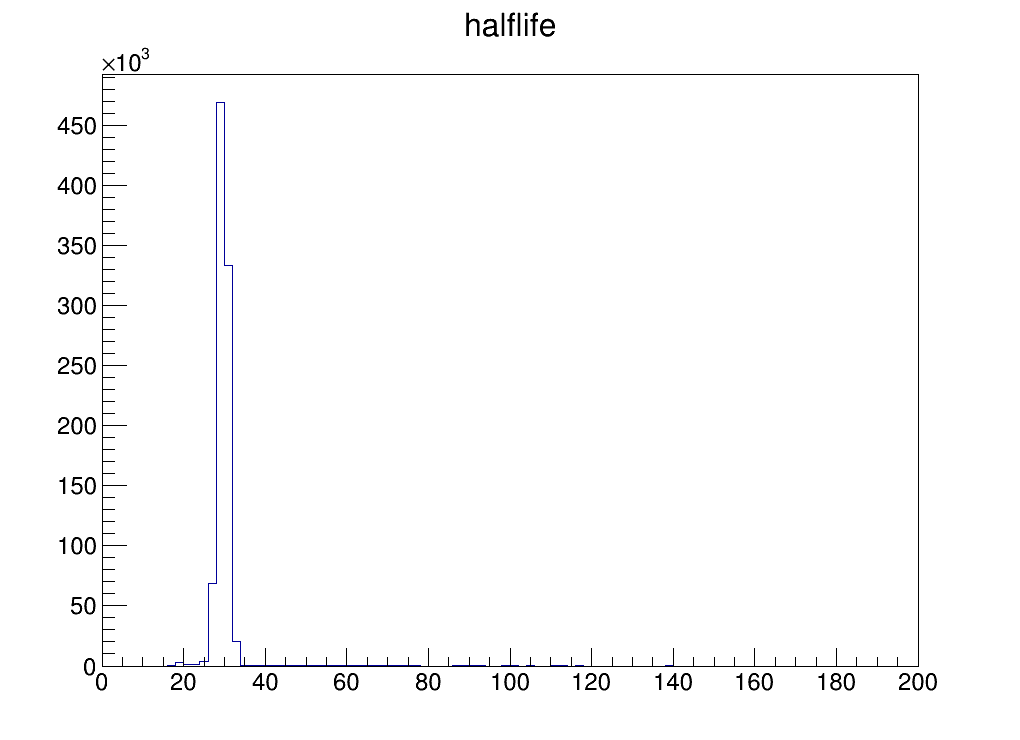

In [11]:
c = ROOT.TCanvas("halflife", "halflife", 1024, 768)
hist1=df.Histo1D(("halflife", "halflife", 100, 0, 200), "halflife")
hist1.Draw()
c.Draw()

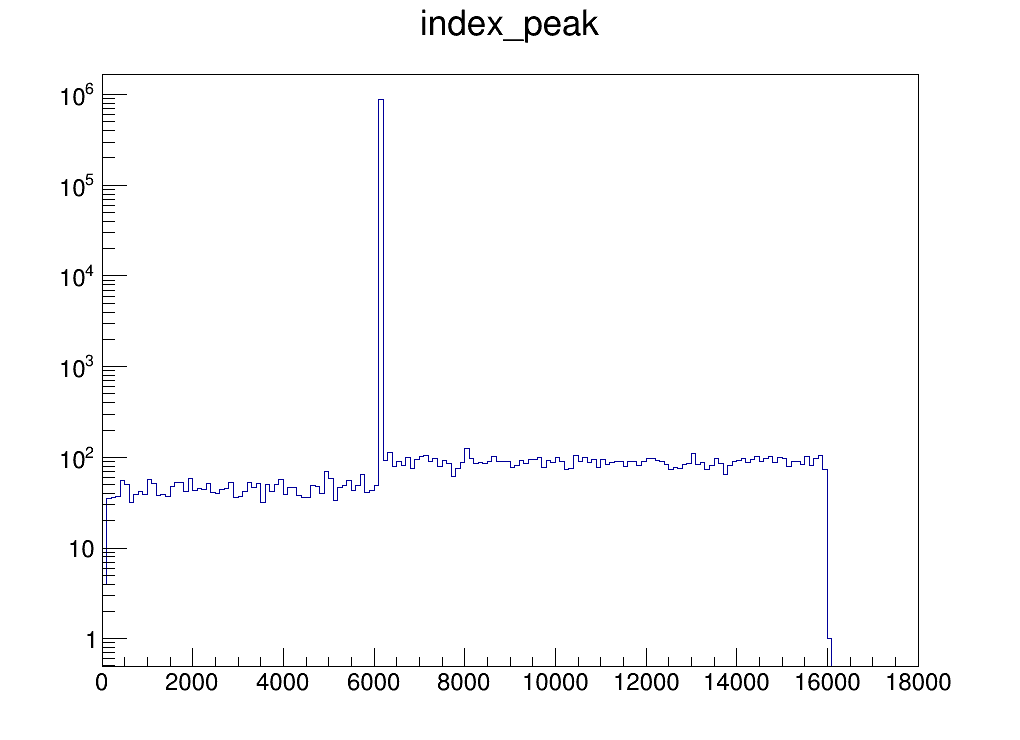

In [12]:
c = ROOT.TCanvas("index_peak", "index_peak", 1024, 768)
hist1=df.Histo1D(("index_peak", "index_peak", 180, 0, 18000), "index_peak")
c.SetLogy()
hist1.Draw()
c.Draw()

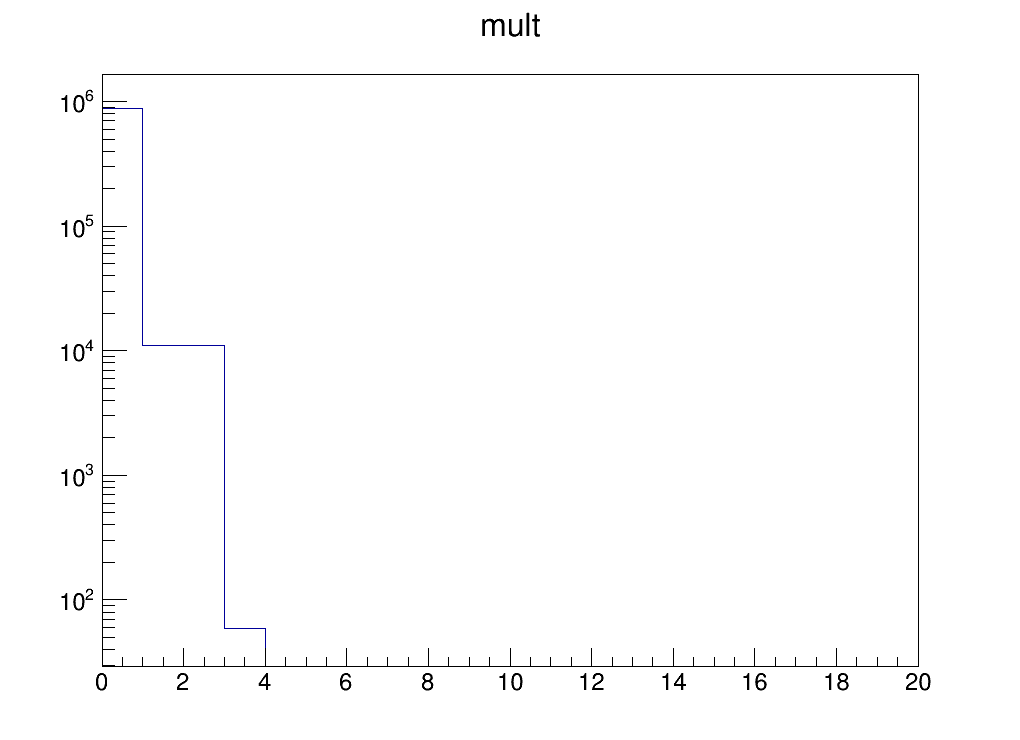

In [13]:
c = ROOT.TCanvas("mult", "mult", 1024, 768)
hist1=df.Histo1D(("mult", "mult", 20, 0, 20), "mult")
c.SetLogy()
hist1.Draw()
c.Draw()

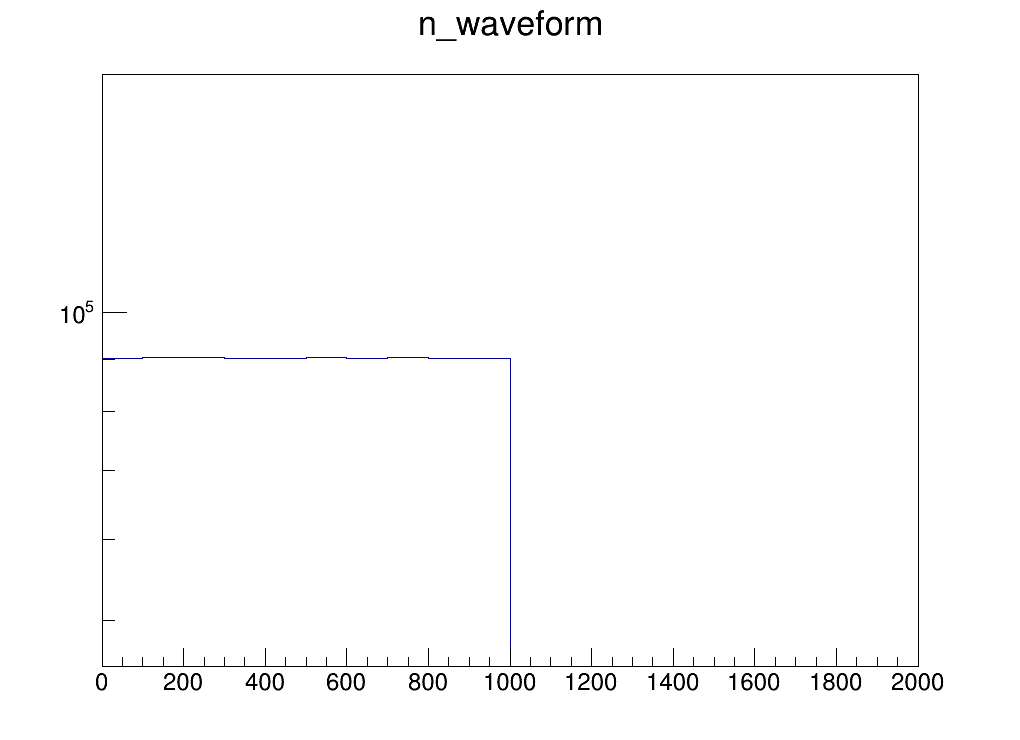

In [14]:
c = ROOT.TCanvas("n_waveform", "n_waveform", 1024, 768)
hist1=df.Histo1D(("n_waveform", "n_waveform", 20, 0, 2000), "n_waveform")
c.SetLogy()
hist1.Draw()
c.Draw()

# Spectra

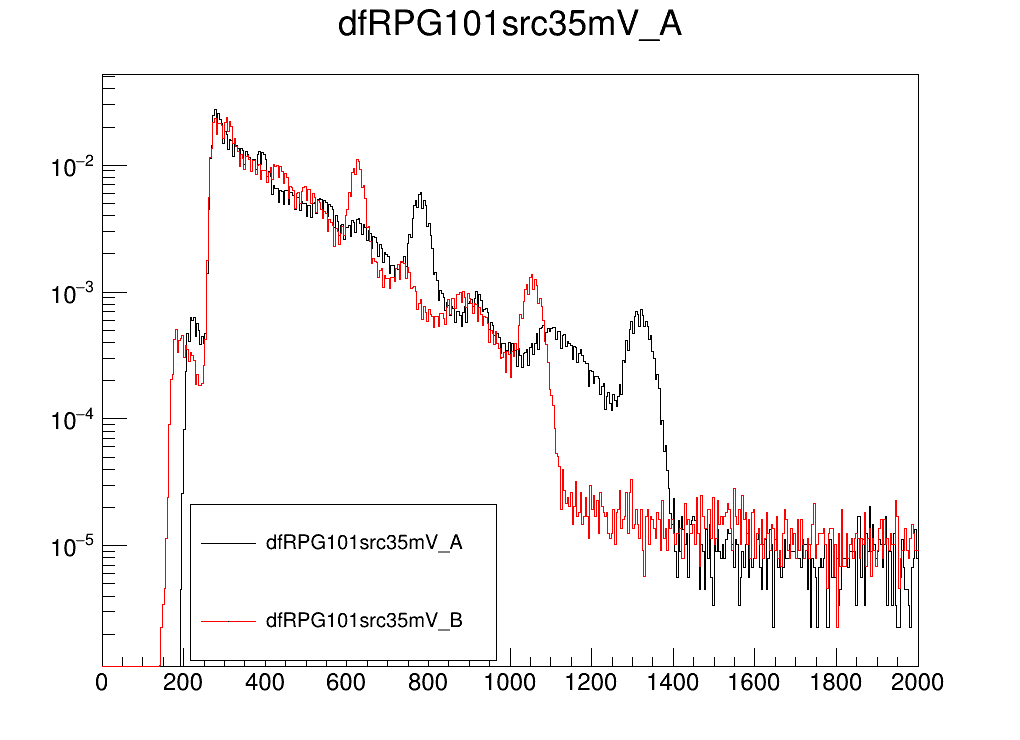

In [15]:
dfA =   dfRPG101src35mV_A
dfAtxt="dfRPG101src35mV_A"
histA=dfA.Histo1D((dfAtxt, dfAtxt, 500, 0, 2000), "peak")
histA.Scale(1/histA.Integral())
histA.SetLineWidth(1)
histA.SetLineColor(1)

dfB =   dfRPG101src35mV_B
dfBtxt="dfRPG101src35mV_B"
histB=dfB.Histo1D((dfBtxt, dfBtxt, 500, 0, 2000), "peak")
histB.Scale(1/histB.Integral())
histB.SetLineWidth(1)
histB.SetLineColor(2)

c1 = ROOT.TCanvas("peak", "peak", 1024, 768)
#c1.SetLogx()
c1.SetLogy()

#histA.GetYaxis().SetRangeUser(0, 1)
histA.Draw("HIST")
histB.Draw("SAMEHIST")
c1.BuildLegend()
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("integral1", "integral1", 1024, 768)
#c1.SetLogx()
c1.SetLogy()


range1=dfA.Max("integral1").GetValue()
range1=90000
binsenergy=int((range1-1000)/40)
print(range1)

histA=dfA.Histo1D((dfAtxt, dfAtxt, binsenergy, 1000, range1), "integral1")
histA.Scale(1/histA.Integral())
histA.SetLineColor(1)
histA.SetLineWidth(1)

histB=dfB.Histo1D((dfBtxt, dfBtxt, binsenergy, 1000, range1), "integral1")
histB.Scale(1/histB.Integral())
histB.SetLineColor(2)
histB.SetLineWidth(1)



histA.Draw("HIST")
histB.Draw("SAMEHIST")

c1.BuildLegend()
c1.Draw()

In [ ]:



df1 =   dfRPG101src35mV
df1txt="dfRPG101src35mV"

df2 =   dfRPG102src35mV
df2txt="dfRPG102src35mV"

df3 =   dfRPG103src35mV
df3txt="dfRPG103src35mV"

df4 =   dfRPG104src35mV
df4txt="dfRPG104src35mV"

df5 =   dfRPG105src35mV
df5txt="dfRPG105src35mV"

df6 =   dfRPG106src35mV
df6txt="dfRPG106src35mV"


histA=df1.Histo1D((df1txt, df1txt, 900, 0, 9000), "peak")
histA.Scale(1/histA.Integral())
histA.SetLineWidth(2)
histA.SetLineColor(1)

histS=df2.Histo1D((df2txt, df2txt, 900, 0, 9000), "peak")
histS.Scale(1/histS.Integral())
histS.SetLineColor(2)

histS1=df3.Histo1D((df3txt, df3txt, 900, 0, 9000), "peak")
histS1.Scale(1/histS1.Integral())
histS1.SetLineColor(6)

histS2=df4.Histo1D((df4txt, df4txt, 900, 0, 9000), "peak")
histS2.Scale(1/histS2.Integral())
histS2.SetLineColor(4)

histS3=df5.Histo1D((df5txt, df5txt, 900, 0, 9000), "peak")
histS3.Scale(1/histS3.Integral())
histS3.SetLineColor(7)

histS4=df6.Histo1D((df6txt, df6txt, 900, 0, 9000), "peak")
histS4.Scale(1/histS4.Integral())
histS4.SetLineColor(8)

c1 = ROOT.TCanvas("peak", "peak", 1024, 768)
c1.SetLogx()
c1.SetLogy()

histA.GetYaxis().SetRangeUser(0, 1)
histA.Draw("HIST")
histS.Draw("HISTSAME")
histS1.Draw("HISTSAME")

histS2.Draw("HISTSAME")
histS3.Draw("HISTSAME")
histS4.Draw("HISTSAME")

c1.BuildLegend()
c1.Draw()

#confronto vecchia e nuova versione codice
#df2o =   dfRPG101bkg100mVold
#df2otxt="dfRPG101bkg100mVold"
#histSo=df2o.Histo1D((df2otxt, df2otxt, 900, 0, 9000), "peak")
#histSo.Scale(1/histSo.Integral())
#histSo.SetLineColor(2)
#c2 = ROOT.TCanvas("peak2", "peak2", 1024, 768)
#c2.SetLogx()
#c2.SetLogy()
#histS.Draw("HIST")
#histS1.Draw("HISTSAME")
#c2.BuildLegend()
#c2.Draw()


In [ ]:
c1 = ROOT.TCanvas("integral1", "integral1", 1024, 768)
c1.SetLogx()
c1.SetLogy()


range1=df1.Max("integral1").GetValue()
binsenergy=int(range1-1000/100)

histA=df1.Histo1D((df1txt, df1txt, binsenergy, 1000, range1), "integral1")
histA.Scale(1/histA.Integral())
histA.SetLineColor(1)
histA.SetLineWidth(3)

histS=df2.Histo1D((df2txt, df2txt, binsenergy, 1000, range1), "integral1")
histS.Scale(1/histS.Integral()*3.1)
histS.SetLineColor(2)

histS1=df3.Histo1D((df3txt, df3txt, binsenergy, 1000, range1), "integral1")
histS1.Scale(1/histS1.Integral()*1.4)
histS1.SetLineColor(3)

histA.Draw("HIST")
histS.Draw("HISTSAME")
histS1.Draw("HISTSAME")

c1.BuildLegend()
c1.Draw()


In [ ]:
df=dfRPG101src35mV
txt = "dfRPG101src35mV"

range1=df.Max("integral1").GetValue()
binsenergy=int(range1/100)

c1 = ROOT.TCanvas("integralA", "integralA", 1024, 768)
c1.SetLogx()
c1.SetLogy()

histA=df.Histo1D(("integral1-"+txt, "integral1-"+txt, binsenergy, 0, range1), "integral1")
histA.SetLineColor(1);
histA.SetLineWidth(2);
histA.Draw()

histB=df.Histo1D(("integral2-"+txt, "integral2-"+txt, binsenergy, 0, range1), "integral2")
histB.SetLineColor(2);
histB.Draw("SAME")

histC=df.Histo1D(("integral3-"+txt, "integral3-"+txt, binsenergy, 0, range1), "integral3")
histC.SetLineColor(3);
#histC.Draw("SAME")

c1.BuildLegend()
c1.Draw()

In [ ]:
df=dfRPG101src35mV
txt = "dfRPG101src35mV"
#df1=dfRPG102src35mV
txt1 = "dfRPG102src35mV"
df3=dfRPG103src35mV
txt3 = "dfRPG103src35mV"
#df4=dfRPG104src35mV
txt4 = "dfRPG104src35mV"
df5=dfRPG105src35mV
txt5 = "dfRPG105src35mV"
#df6=dfRPG106src35mV
txt6 = "dfRPG106src35mV"

range1=df.Max("integral1").GetValue()
binsenergy=int(range1/100)

c1 = ROOT.TCanvas("integralA", "integralA", 1024, 768)
c1.SetLogx()
c1.SetLogy()

histA=df.Histo1D(("integral1-"+txt, "integral1-"+txt, binsenergy, 0, range1), "integral1")
histA.SetLineColor(1);
histA.SetLineWidth(2);
histA.Draw("HIST")

#histB=df1.Histo1D(("integral1-"+txt1, "integral1-"+txt1, binsenergy, 0, range1), "integral1")
#histB.SetLineColor(2);
#histB.SetLineWidth(2);
#histB.Draw("HISTSAME")

hist3=df3.Histo1D(("integral1-"+txt3, "integral1-"+txt3, binsenergy, 0, range1), "integral1")
hist3.SetLineColor(3);
hist3.SetLineWidth(2);
hist3.Draw("HISTSAME")

#hist4=df4.Histo1D(("integral1-"+txt4, "integral1-"+txt4, binsenergy, 0, range1), "integral1")
#hist4.SetLineColor(4);
#hist4.SetLineWidth(2);
#hist4.Draw("HISTSAME")

hist5=df5.Histo1D(("integral1-"+txt5, "integral1-"+txt5, binsenergy, 0, range1), "integral1")
hist5.SetLineColor(8);
hist5.SetLineWidth(2);
hist5.Draw("HISTSAME")

#hist6=df6.Histo1D(("integral1-"+txt6, "integral1-"+txt6, binsenergy, 0, range1), "integral1")
#hist6.SetLineColor(7);
#hist6.SetLineWidth(2);
#hist6.Draw("HISTSAME")


c1.BuildLegend()
c1.Draw()

In [ ]:
df=dfRPG102src35mV
txt = "dfRPG101src35mV"

range1=df.Max("integral1").GetValue()
binsenergy=int(range1/100)

c1 = ROOT.TCanvas("integralSRC", "integralSRC", 1024, 768)
c1.SetLogx()
c1.SetLogy()

histA=df.Histo1D(("integral1-"+txt, "integral1-"+txt, binsenergy, 0, range1), "integral1")
histA.SetLineColor(1);
histA.SetLineWidth(2);
histA.Draw()

histB=df.Histo1D(("integral2-"+txt, "integral2-"+txt, binsenergy, 0, range1), "integral2")
histB.SetLineColor(2);
histB.Draw("SAME")

histC=df.Histo1D(("integral3-"+txt, "integral3-"+txt, binsenergy, 0, range1), "integral3")
histC.SetLineColor(3);
#histC.Draw("SAME")

c1.BuildLegend()
c1.Draw()

In [ ]:
## CONFRONTO TUTTI GLI RPG
df1    =dfRPG101src35mV
txt1 = "dfRPG101src35mV"

df2    =dfRPG102src35mV
txt2 = "dfRPG102src35mV"

df3    =dfRPG103src35mV
txt3 = "dfRPG103src35mV"

df4    =dfRPG104src35mV
txt4 = "dfRPG104src35mV"

df5 = dfRPG105src35mV
txt5="dfRPG105src35mV"

df6 = dfRPG106src35mV
txt6="dfRPG106src35mV"



param="integral1"

range1=df1.Max(param).GetValue()
binsenergy=int(range1/100)

c1 = ROOT.TCanvas("integralSRC-BKG", "integralSRC-BKG", 1024, 768)
c1.SetLogx()
c1.SetLogy()


hist1=df1.Histo1D((param+"-"+txt1, param+"-"+txt1, binsenergy, 0, range1), param)
hist1.Scale(1/hist1.Integral() * 1)
hist1.SetLineColor(1)
hist1.SetLineWidth(2)
hist1.GetYaxis().SetRangeUser(0, 1)


hist2=df2.Histo1D((param+"-"+txt2, param+"-"+txt2, binsenergy, 0, range1), param)
hist2.Scale(1/hist2.Integral() * 1)
hist2.SetLineColor(2);


hist3=df3.Histo1D((param+"-"+txt3, param+"-"+txt3, binsenergy, 0, range1), param)
hist3.Scale(1/hist3.Integral() * 1)
hist3.SetLineColor(6);


hist4=df4.Histo1D((param+"-"+txt4, param+"-"+txt4, binsenergy, 0, range1), param)
hist4.Scale(1/hist4.Integral() * 1)
hist4.SetLineColor(4);


hist5=df5.Histo1D((param+"-"+txt5, param+"-"+txt5, binsenergy, 0, range1), param)
hist5.Scale(1/hist5.Integral() * 1) #0.2
hist5.SetLineColor(7);


hist6=df6.Histo1D((param+"-"+txt6, param+"-"+txt6, binsenergy, 0, range1), param)
hist6.Scale(1/hist6.Integral() * 1) #0.3
hist6.SetLineColor(8);





hist1.Draw("HIST")
hist2.Draw("HISTSAME")
hist3.Draw("HISTSAME")
hist4.Draw("HISTSAME")
hist5.Draw("HISTSAME")
hist6.Draw("HISTSAME")


c1.BuildLegend()
c1.Draw()

In [ ]:
c2 = ROOT.TCanvas("integralBKG", "integralBKG", 1024, 768)
c2.SetLogx()
c2.SetLogy()

hist1.Draw("HIST")
hist8.Draw("HISTSAME")
hist6.Draw("HISTSAME")
hist5.Draw("HISTSAME")

c2.BuildLegend()
c2.Draw()

In [ ]:
c3 = ROOT.TCanvas("integralSRC", "integralSRC", 1024, 768)
c3.SetLogx()
c3.SetLogy()

hist2.Draw("HIST")
hist7.Draw("HISTSAME")
hist3.Draw("HISTSAME")
hist4.Draw("HISTSAME")

c3.BuildLegend()
c3.Draw()

In [ ]:
histogram = hist6
with open("valori_dei_bin.txt", "w") as file_txt:
    for bin_index in range(1, histogram.GetNbinsX() + 1):
        bin_value = histogram.GetBinContent(bin_index)
        file_txt.write(f"Bin {bin_index}: {bin_value}\n")

In [ ]:
stop

hist = hist6
hist.SetLineColor(1)
c3 = ROOT.TCanvas("integralSRC-BKG", "integralSRC-BKG", 1024, 768)
c3.SetLogx()
c3.SetLogy()

# Definire una funzione TF1 per la power law
def power_law(x, params):
    return params[0] * (x[0]**params[1])

power_law_func = ROOT.TF1("power_law_func", power_law, 16000, 71000, 2)  # 2 parametri

# Imposta stime iniziali per i parametri della power law
power_law_func.SetParameters(0.2, -2)

if False:
    # Creare una funzione TF1 per il fit dei picchi gaussiani
    num_peaks = 3  # Imposta il numero di picchi desiderati
    gaussian_peak_funcs = []
    
    for i in range(num_peaks):
        gaussian_peak_func = ROOT.TF1(f"gaussian_peak_func_{i}", "gaus", 0, 100)
        gaussian_peak_func.SetParameters(100, 20 * (i + 1), 5)  # Stime iniziali dei parametri
        gaussian_peak_funcs.append(gaussian_peak_func)
    
    # Combinare la power law e i picchi gaussiani
    total_fit_func = ROOT.TF1("total_fit_func", "[0]*power_law_func + [1]*gaussian_peak_func_0 + [2]*gaussian_peak_func_1 + [3]*gaussian_peak_func_2", 16000, 71000)
    total_fit_func.SetParameters(1, 1, 1, 1)  # Stime iniziali per i coefficienti

fit_function = power_law_func

# Eseguire il fit
hist.Fit(power_law_func, "R")

# Estrai i parametri fittati
A = fit_function.GetParameter(0)
n = fit_function.GetParameter(1)

# Calcola gli errori sui parametri
err_A = fit_function.GetParError(0)
err_n = fit_function.GetParError(1)

# Stampa i risultati
print(f"Parametro A: {A} +/- {err_A}")
print(f"Parametro n: {n} +/- {err_n}")

histogram.Draw("HIST")
fit_function.Draw("SAME")
c3.BuildLegend()
c3.Draw()

In [ ]:
df1=dfRPG101src25mV
txt = "dfRPG101src25mV"

c2 = ROOT.TCanvas("integralB", "integralB", 1024, 768)
c2.SetLogx()
c2.SetLogy()

histA.Scale(1/histA.Integral())
histA.Draw("HIST")

histB.Scale(1/histB.Integral())
histB.Draw("HISTSAME")

histA1=df1.Histo1D(("integral1-"+txt, "integral1-"+txt, binsenergy, 0, range1), "integral1")
histA1.SetLineColor(3);
histA1.SetLineWidth(2);
histA1.Scale(1/histA1.Integral())
histA1.Draw("HISTSAME")

histB1=df1.Histo1D(("integral2-"+txt, "integral2-"+txt, binsenergy, 0, range1), "integral2")
histB1.SetLineColor(4);
histB1.Scale(1/histB1.Integral())
histB1.Draw("HISTSAME")

c2.BuildLegend()
c2.Draw()

# Light curve

In [ ]:
tstart1 = tstart[0]
tend1 = tstart[len(tstart)-1]

binsizesecs = 10
df0 = df.Filter("tstart >= "+str(tstart1))

tmin=tstart1
tmax=tend1

nbins = (int(tmax) - int(tmin) + 1) / binsizesecs

print(tmin)
print(tmax)
print(tend1)
print(tmax-tmin)
print(int(nbins))

In [ ]:
lcRPG0 = df0.Histo1D(("time2", "RPG0 - "+str(binsizesecs)+" s - "+str(int(tmin))+"-"+str(int(tmax))+"", int(nbins), tmin, tmax), "tstart")
c = ROOT.TCanvas("LC1", "LC1", 1024, 768)

lcRPG0.Draw()
c.Draw()

# Temperature analysis dependencies

In [ ]:
stop

In [ ]:
df1 = df.Filter("temp < 10")
df2 = df.Filter("temp >= 10 and temp <15")
df3 = df.Filter("temp >= 15 and temp <20")
df4 = df.Filter("temp >= 25 and temp <30")
df5 = df.Filter("temp >= 30")

In [ ]:
c = ROOT.TCanvas("LC1", "LC1", 1024, 768)

hist1=df1.Histo1D(("halflife10", "halflife10", 100, 0, 200), "halflife")
hist1.Scale(1/hist1.Integral())

hist2=df2.Histo1D(("halflife15", "halflife15", 100, 0, 200), "halflife")
hist2.Scale(1/hist2.Integral())

hist3=df3.Histo1D(("halflife20", "halflife20", 100, 0, 200), "halflife")
hist3.Scale(1/hist3.Integral())

hist4=df4.Histo1D(("halflife25", "halflife25", 100, 0, 200), "halflife")
hist4.Scale(1/hist4.Integral())

hist5=df5.Histo1D(("halflife30", "halflife30", 100, 0, 200), "halflife")

hist2.SetLineColor(1);
hist1.SetLineColor(2);
hist3.SetLineColor(3);
hist4.SetLineColor(4);

hist2.Draw("HIST")
hist1.Draw("SAME")
hist3.Draw("SAME")
hist4.Draw("SAME")
c.BuildLegend()
c.Draw()

In [ ]:
hist2.SetLineColor(1);
hist1.SetLineColor(2);
hist3.SetLineColor(3);
hist4.SetLineColor(4);
hist4.Draw("HIST")
hist2.Draw("HISTSAME")
hist1.Draw("HISTSAME")
hist3.Draw("HISTSAME")

c.BuildLegend()
c.Draw()

# Peak analysis

In [ ]:
dfm1 = df.Filter("peak <= 1000")
dfm2 = df.Filter("peak > 1000 && peak < 8100")
dfm3 = df.Filter("peak > 8100")

In [ ]:
c2 = ROOT.TCanvas("mult", "mult", 1024, 768)
histm1=dfm1.Histo1D(("halflifem1", "halflifem1", 100, 0, 200), "halflife")
histm1.Scale(1/histm1.Integral())
histm2=dfm2.Histo1D(("halflifem2", "halflifem2", 100, 0, 200), "halflife")
histm2.Scale(1/histm2.Integral())
histm3=dfm3.Histo1D(("halflifem3", "halflifem3", 100, 0, 200), "halflife")
histm3.Scale(1/histm3.Integral())

histm1.SetLineColor(1);
histm2.SetLineColor(2);
histm3.SetLineColor(3);

histm1.Draw("HIST")
histm2.Draw("HISTSAME")
histm3.Draw("HISTSAME")

c2.BuildLegend()
c2.SetLogy()
c2.Draw()

In [ ]:
cint1 = ROOT.TCanvas("integral1", "integral1", 1024, 768)
histint1=df.Histo1D(("integral1", "integral1", 1000, 0, 2000000), "integral1")
histint2=df.Histo1D(("integral2", "integral2", 1000, 0, 2000000), "integral2")
histint3=df.Histo1D(("integral3", "integral3", 1000, 0, 2000000), "integral3")
cint1.SetLogx()
cint1.SetLogy()
histint1.SetLineColor(1);
histint2.SetLineColor(2);
histint3.SetLineColor(3);
histint1.Draw()

histint2.Draw("SAME")
histint3.Draw("SAME")
cint1.Draw()